In [207]:
from datetime import *

intersections = {"\'apeg267\'": "2nd (SB only) and Blanchard", "\'apeg263\'": "1st and Lenora"}
week = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

import matplotlib.pyplot as plt

valnames = {"\'apeg267\'": "2nd and Blanchard", "\'apeg263\'": "1st and Lenora"}

week = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

traffic_files = ["2nd_broad_to_stewart.csv", "1st_broad_to_stewart.csv", "stewart_to_broad.csv"]

tfile_map = {"2nd_broad_to_stewart.csv": "\'apeg267\'", "1st_broad_to_stewart.csv": "\'apeg263\'", "stewart_to_broad.csv": "\'apeg263\'"}
delays = {}

for f in traffic_files:
    if f == "1st_broad_to_stewart.csv":
        cardinal = 4
    if f == "stewart_to_broad.csv":
        cardinal = 8
    if f == "2nd_broad_to_stewart.csv":
        cardinal = 4
    inter = tfile_map[f]
    if inter not in delays.keys():
        delays[inter] = {}
    delays[inter][cardinal] = {}
    infile = open("../data/congestion/" + f, "r")
    print(infile.readline())
    lines = infile.readlines()
    delays[inter][cardinal]["dates"] = []
    delays[inter][cardinal]["best"] = []
    delays[inter][cardinal]["avg"] = []
    delays[inter][cardinal]["worst"] = []
    for l in lines:
        line = l.strip().split(",")
        dt = datetime.strptime(line[0], "%Y-%m-%d %H:%M:%S")
        ndt = datetime(year=2016, month=dt.month, day=dt.day, hour=dt.hour, minute=dt.minute, second=dt.second)
        delays[inter][cardinal]["dates"].append(ndt)
        delays[inter][cardinal]["best"].append(float(line[1]))
        delays[inter][cardinal]["avg"].append(float(line[2]))
        delays[inter][cardinal]["worst"].append(float(line[3]))
    
    
    infile.close()

dates = sorted(delays[inter][cardinal]["dates"])

,optimistic_time,best_guess_time,pessimistic_time

,optimistic_time,best_guess_time,pessimistic_time

,optimistic_time,best_guess_time,pessimistic_time



In [208]:
delays["'apeg263'"].keys()

[8, 4]

In [209]:
#read traffic volume, match day of week and hour and 15 minute block to 15 minute total volume
import numpy as np

volumes = {}
for i in ["1","2","3","4","5"]:
    with open("../data/congestion/Traffic.BARHAM_BELLTOWN-" + i + ".csv", "r") as f:
        lines = f.readlines()
        road = ""
        for line in lines:
            if line[0:7] == "Results":
                tok_1 = line.split(",")
                tok_2 = tok_1[0].split(" ")
                road = tok_2[-1]
                direction = tok_2[4]
                if road not in volumes.keys():
                    volumes[road] = {}
                if direction not in volumes[road].keys():
                    volumes[road][direction] = {}
                    volumes[road][direction]["dates"] = []
                    volumes[road][direction]["vol"] = []
            if line[0:1] == "0":
                tokens = line.strip().split(",")
                dt = datetime.strptime(tokens[0].rstrip(" PDT"), "%m/%d/%Y %H:%M:%S")
                try:
                    vol = float(tokens[2])
                except:
                    vol = np.nan
                volumes[road][direction]["dates"].append(dt)
                volumes[road][direction]["vol"].append(vol)

intersections = volumes.keys()
directions = {}
for road in intersections:
    directions[road] = volumes[road].keys()

for road in intersections:
    for direction in directions[road]:
        cardinal = direction.split("_")[0].lstrip("\'")
        if cardinal not in volumes[road].keys():
            volumes[road]["cardinals"] = set()
            volumes[road][cardinal] = {}
            volumes[road][cardinal]["dates"] = []
            volumes[road][cardinal]["vol"] = []
            volumes[road][cardinal]["lanes"] = set()
        volumes[road][cardinal]["lanes"].add(direction)
        volumes[road]["cardinals"].add(cardinal)
        
for road in intersections:
    for cardinal in volumes[road]["cardinals"]:
        vols = []
        for lane in volumes[road][cardinal]["lanes"]:
            vols.append(volumes[road][lane]["vol"])
        vols = np.sum(np.asarray(vols), axis = 0)
        volumes[road][cardinal]["vol"] = vols
        volumes[road][cardinal]["dates"] = volumes[road][lane]["dates"]
            

In [210]:
def hourly_delay_by_status(inter, card, status="worst", traffic_windows=[[0,12], [12,19], [19,23]]):
    #traffic windows should be a list of intervals between 0 and 23
    outputs = {}
    for i in range(len(traffic_windows)):
        outputs[i] = {}
        outputs[i]["vol"] = []
        outputs[i]["delay"] = []
    outputs["all"] = {}
    outputs["all"]["delay"] = []
    outputs["all"]["vol"] = []
    
    avgvols = {}
    for i in range(len(dates)):
        if dates[i].weekday() < 5: #currently excluding saturday
            h = dates[i].hour
            m = dates[i].minute
            if h not in avgvols.keys():
                avgvols[h] = {}
            if m not in avgvols[h].keys():
                avgvols[h][m] = {}
                avgvols[h][m]["delay"] = []
                avgvols[h][m]["vol"] = []
            dateindex = delays[inter][card]["dates"].index(dates[i])
            avgvols[h][m]["delay"].append(delays[inter][card][status][dateindex])
            avgvols[h][m]["vol"].append(vols[i,])

    hrs = sorted(avgvols.keys())
    mins = sorted(avgvols[h].keys())
    for h in hrs:
        for m in mins:
            outputs["all"]["delay"].append(np.nanmean(avgvols[h][m]["delay"]))
            outputs["all"]["vol"].append(np.nanmean(avgvols[h][m]["vol"]))
            for i in range(len(traffic_windows)):
                if h >= traffic_windows[i][0] and h < traffic_windows[i][1]:
                    outputs[i]["vol"].append(np.nanmean(avgvols[h][m]["vol"]))
                    outputs[i]["delay"].append(np.nanmean(avgvols[h][m]["delay"]))
    return(outputs)

In [284]:
#specify intersection
#specify direction
inter = "\'apeg263\'"
cardinal = 4
status = "worst"

#for reference
valnames = {"\'apeg267\'": "2nd and Blanchard", "\'apeg263\'": "1st and Lenora"}

week = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

traffic_files = ["denny_to_battery.csv", "broad_to_stewart.csv", "stewart_to_broad.csv"]

tfile_map = {"denny_to_battery.csv": "\'apeg267\'", 
             "broad_to_stewart.csv": "\'apeg263\'", 
             "stewart_to_broad.csv": "\'apeg263\'"}
#broad_to_stewart = 4 cardinal
#stewart_to_broad = 8 cardinal

In [285]:
#delay functions

#traffic_windows=[[0,12], [12, 16], [16,18], [18,23]]
traffic_windows = [ [4*j, 4*j + 4] for j in range(6)]
tod_delays = hourly_delay_by_status(inter, cardinal, status, traffic_windows)

def linear_fit(volarray, delayarray):
    x = np.array(volarray)
    y = np.array(delayarray)

    A = np.vstack([x, np.ones(len(x))]).T
    res = np.linalg.lstsq(A, y)
    return(res)

def linear_model(fit, volvalue):
    m, c = fit[0]
    print(m, c)
    delay = m*volvalue + c
    return(delay)

delay_linear_fits = {}
for i in range(len(traffic_windows)):
    lin_fit = linear_fit(tod_delays[i]["vol"], tod_delays[i]["delay"])
    delay_linear_fits[i] = lin_fit
    delay_linear_fits["all"] = linear_fit(tod_delays["all"]["vol"], tod_delays["all"]["delay"])
    
def get_delay_by_hour(hour, volume, traffic_windows, total=False):
    interval = 0
    for i in range(len(traffic_windows)):
        if hour >= traffic_windows[i][0] and hour < traffic_windows[i][1]:
            interval = i
    if total == True:
        fit = delay_linear_fits["all"]
    else:
        fit = delay_linear_fits[interval]
    delay = linear_model(fit, volume)
    return(delay)

In [286]:
delay_linear_fits

{0: (array([  10.29918893,  196.07900432]),
  array([ 10480.77877325]),
  2,
  array([ 27.13411721,   1.57139529])),
 1: (array([   0.7597197 ,  191.19778063]),
  array([ 474.48173352]),
  2,
  array([ 113.24503188,    2.30572206])),
 2: (array([  -0.47329405,  324.48225882]),
  array([ 13624.47285522]),
  2,
  array([  2.06476153e+02,   2.03527957e-01])),
 3: (array([  1.98566174e-01,   3.54599109e+02]),
  array([ 730.87299025]),
  2,
  array([  2.43396559e+02,   2.15575561e-01])),
 4: (array([  3.25696412e-01,   3.55280818e+02]),
  array([ 4888.55918781]),
  2,
  array([ 219.51263021,    0.42565213])),
 5: (array([   1.35647468,  285.462862  ]),
  array([ 628.91191066]),
  2,
  array([ 142.15407413,    0.96166974])),
 'all': (array([   2.14706737,  224.2095978 ]),
  array([ 182415.37960057]),
  2,
  array([ 428.73727697,    4.67830474]))}

In [287]:
13 >= traffic_windows[1][0] and 13 < traffic_windows[1][1]

False

In [288]:
get_delay_by_hour(2, 100, traffic_windows, total=True)


(2.1470673742223778, 224.20959780332734)


438.91633522556515

In [289]:
#now I need expected rejections by hour on all block-faces adjacent to 1st and 2nd avenues
import numpy as np
import pickle

with open("/home/chase/Dropbox/parking/2017cikm-tex/figs/ipython/ElementKeytoLatLong.pck", 'r') as pick:
    elementkeytolatlong = pickle.load(pick)
    
blockids = sorted(elementkeytolatlong)

first = [1017, 1018, 1021, 1022, 1025, 1026, 1029, 1030, 1033]
second = [2789, 2790, 2785, 2786, 2781, 2782, 70750, 70746, 25705, 25706]

#first value is the block-face, all values following it are blocks that are accessible from the first
#so I need to go through every row and check if any of first or second list above are accessible from the first element 
#in row
first_feed = []
second_feed = []

first_out = []
second_out = []

with open("/home/chase/Dropbox/parking/2017cikm-tex/figs/ipython/belltown-blockface-accessibility.csv") as f:
    header = f.readline()
    data = f.readlines()
    for line in data:
        tokens = line.split("#")
        ekeys = tokens[0].strip().split(",")
        origin = ekeys.pop(0).strip()
        if len(origin) > 0:
            origin = int(origin)
            ekeys = [ int(ek.strip()) for ek in ekeys if len(ek) > 1 ]
            if origin in first:
                first_out += ekeys
            elif origin in second:
                second_out += ekeys
            for ek in ekeys:
                if ek in first:
                    first_feed.append(origin)
                if ek in second:
                    second_feed.append(origin)
                    
            
    
"""
adj = np.loadtxt('/home/chase/Dropbox/parking/2017cikm-tex/figs/ipython/belltown-dir-array.txt', delimiter=' ')
for i in range(len(blockids)):
    bid = blockids[i]
    for j in range(len(blockids)):
        if adj[i,j] > 0:
            to_block = blockids[j]
            from_block = blockids[i]
            if to_block in first:
                first_feed.append(to_block)
            if from_block in first:
                first_out.append(from_block)
            if to_block in second:
                second_feed.append(to_block)
            if from_block in second:
                second_out.append(from_block)
"""

first = list(set(first + first_feed + first_out))
first_i = [ blockids.index(bid) for bid in first ]
second = list(set(second + second_feed + second_out))
second_i = [ blockids.index(bid) for bid in second ]

#key is "apegintersection" value and values are dicts of average volume of vehicles per hour
with open("/home/chase/Dropbox/parking/2017cikm-tex/figs/ipython/traffic_data/fixed_service_perblockface/avg_daily_volume_per_hour.pck", 'r') as pick:
    volumeperhour = pickle.load(pick)




In [290]:
second_i

[57,
 58,
 41,
 42,
 202,
 122,
 67,
 229,
 160,
 10,
 197,
 11,
 62,
 63,
 199,
 47,
 235,
 175,
 198,
 201,
 12,
 13,
 14,
 15,
 82,
 83,
 84,
 85,
 88,
 89,
 119,
 174,
 239,
 120,
 200]

In [291]:
def get_daily_blocks_rejections(blocklist_i, day):
    rejection_data = 60.0/np.loadtxt("/home/chase/Dropbox/parking/2017cikm-tex/figs/ipython/belltowndata/2016_local_uniformity_fixservice/" + day + "_blockface_Rejections_By_Block.csv", delimiter=",")
    hourly_total = np.zeros((rejection_data.shape[1],))
    for i in blocklist_i:
        hourly_total += rejection_data[i,:]
    return(list(hourly_total))

def get_avg_blocks_traffic_volume_by_direction(intersection, card, day):
    output = hourly_delay_by_status(intersection, card, status, traffic_windows)  
    vs = list(output["all"]["vol"])
    vs_avg = []
    hs = sorted(output.keys())
    for i in range(24):
        hr_avg = []
        for j in range(4):
            hr_avg.append(vs[4*i  + j])
        vs_avg.append(np.mean(np.array(hr_avg)))
    return(vs_avg)

def get_daily_blocks_traffic_volume(intersection, day):
    d = week.index(day)
    traff_vol_dict = volumeperhour[intersection][d]
    hs = sorted(traff_vol_dict.keys())
    vs = []
    for h in hs:
        vs.append(traff_vol_dict[h])
    return(vs)

#test
test = get_daily_blocks_traffic_volume(inter, "Friday")
test_traff = get_daily_blocks_rejections(first_i, "Friday")
test_traff = [0 for i in range(9)] + test_traff + [0 for i in range(5)]

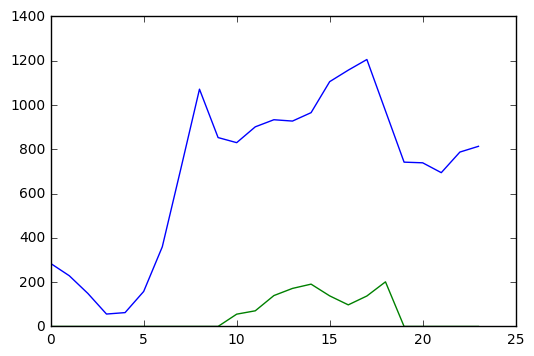

In [292]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(test_traff)
plt.show()

In [293]:
#traffic_windows=[[0,12], [12,19], [19,23]]

print(traffic_windows)

reg_delay = [ get_delay_by_hour(i, test[i], traffic_windows, total=True) for i in range(len(test))]

diff = list(np.array(test) - np.array(test_traff))

traff_delay =  [ get_delay_by_hour(i, diff[i], traffic_windows, total=True) for i in range(len(test))]


[[0, 4], [4, 8], [8, 12], [12, 16], [16, 20], [20, 24]]
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(2.1470673742223778, 224.20959780332734)
(

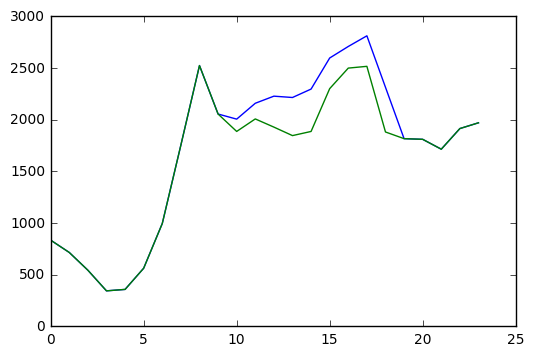

In [294]:
plt.plot(reg_delay)
plt.plot(traff_delay)
plt.show()

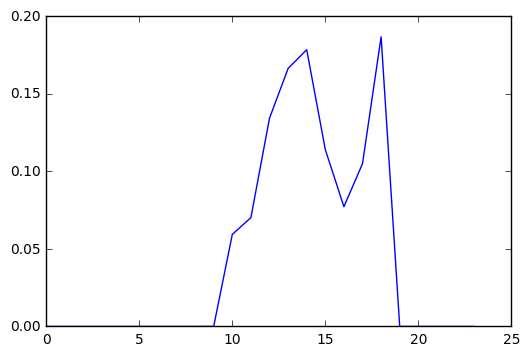

In [295]:
gap = list(np.array(reg_delay) - np.array(traff_delay))
percent_gain = [ gap[i]/reg_delay[i] for i in range(len(gap)) ]

plt.plot(percent_gain)
plt.show()

In [222]:
marg = []